In [ ]:
#!unzip '/content/drive/My Drive/Colab Notebooks/NLMCXR_png.zip' -d '/content'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split

In [ ]:

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/preprocessed_data.csv')

In [ ]:
df

,Frontal,Lateral,indication,findings,impression,count
0,CXR594_IM-2187-1001.png,CXR594_IM-2187-2001.png,pain weakness,there are t spine osteophytes there calcified ...,borderline cardiomegaly age indeterminate chro...,2
1,CXR532_IM-2140-1001.png,CXR532_IM-2140-2001.png,woman vehicle collision,the lungs are clear bilaterally specifically n...,no acute cardiopulmonary abnormality,2
2,CXR541_IM-2147-1001.png,CXR541_IM-2147-1001.png,chest pain,cardiomediastinal contour and pulmonary vascul...,no acute cardiopulmonary findings age indeterm...,1
3,CXR569_IM-2169-0001-0002.png,CXR569_IM-2169-0001-0001.png,rule out aspiration,the heart size and pulmonary vascularity appea...,continued elevation of the left hemidiaphragm ...,2
4,CXR581_IM-2178-1001.png,CXR581_IM-2178-3001.png,dyspnea asthma,frontal and lateral views of the chest show an...,no acute or active cardiac pulmonary or pleura...,2
...,...,...,...,...,...,...
4059,CXR885_IM-2399-2001.png,CXR885_IM-2399-2001.png,with ongoing shortness of breath and history o...,heart size mediastinal contour and pulmonary v...,no acute cardiopulmonary abnormality postsurgi...,1
4060,CXR88_IM-2394-2001.png,CXR88_IM-2394-2001.png,worsening dyspnea history of coronary artery d...,heart is mildly heart enlarged mediastinal con...,findings consistent with mild congestive heart...,1
4061,CXR900_IM-2408-2001.png,CXR900_IM-2408-2001.png,allogeneic bmt w u lab,the heart is normal in size the mediastinum is...,no acute disease,1
4062,CXR904_IM-2409-3003.png,CXR904_IM-2409-3003.png,painful chest,normal heart size left chest tip mid svc right...,stable appearance of the chest no or acute fin...,1


In [ ]:
add_list = []
for i in df['impression'] :
  add_list.append('<start> ' + i + ' <end>')# adding start and end to sentence
df['impression'] = add_list

In [ ]:
y = df['impression']
X = df.drop(['impression'],axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.14,stratify = df['count'],random_state = 10)
X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size = 0.14,random_state = 10,stratify = X_train['count'])

In [ ]:
X_train

,Frontal,Lateral,indication,findings,count
2067,CXR2713_IM-1180-1001.png,CXR2713_IM-1180-2001.png,with a,the heart is normal in size and contour the ao...,2
893,CXR535_IM-2142-1001.png,CXR535_IM-2142-2001.png,copd exacerbation,there is s shaped thoracolumbar scoliosis ther...,2
187,CXR730_IM-2290-1001.png,CXR730_IM-2290-1002.png,history of wheezing,no findings,2
3924,CXR137_IM-0238-2002.png,CXR137_IM-0238-2002.png,bronchitis,no findings,1
859,CXR520_IM-2131-1001.png,CXR520_IM-2131-1001.png,the patient is a male with atrial flutter hype...,no pneumothorax pleural effusion or airspace c...,1
...,...,...,...,...,...
3351,CXR1442_IM-0286-1001.png,CXR1442_IM-0286-2001.png,scleroderma,the cardiac contours are normal the lungs are ...,2
3417,CXR1459_IM-0297-3001.png,CXR1459_IM-0297-2001.png,male shortness of breath,no stable cardiomegaly without focal consolida...,3
658,CXR3986_IM-2041-1001.png,CXR3986_IM-2041-2001.png,anxiety and difficulty breathing,the cardiomediastinal silhouette and vasculatu...,3
1020,CXR3465_IM-1683-1001.png,CXR3465_IM-1683-2001.png,cp,lungs are clear no pleural effusions or pneumo...,2


In [ ]:
#X_test['count'].value_counts()

In [ ]:
X_train = X_train.drop(['indication','findings','count'],axis = 1)
X_cv = X_cv.drop(['indication','findings','count'],axis = 1)
X_test = X_test.drop(['indication','findings','count'],axis = 1)

In [ ]:
print(X_train.shape,X_cv.shape,X_test.shape)

(3005, 2) (490, 2) (569, 2)


In [ ]:
def max_length1(K) :
  'finding maximum length in documents'
  l = []
  for i in K :
    num = 0
    for j in i.split(" ") :
      num += 1
    l.append(num)
  return max(l)
length = max_length1(y_train)
max_doc_length_x = length
print(length)

125


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(filters='')#oov_token="<unknown>",
tokenizer.fit_on_texts(y_train)

vocab_size = len(tokenizer.word_index) + 1
print('Max document length: %d' % length)
print('Vocabulary size: %d' % vocab_size)
imp_vocab_size = vocab_size

encoded = tokenizer.texts_to_sequences(y_train)
enc_train_in = pad_sequences(encoded, maxlen=length, padding='post')

encoded1 = tokenizer.texts_to_sequences(y_test)
enc_test_in = pad_sequences(encoded1, maxlen=length, padding='post')

encoded2 = tokenizer.texts_to_sequences(y_cv)
enc_val_in = pad_sequences(encoded2, maxlen=length, padding='post')

enc_train_in = np.array(enc_train_in)
enc_test_in  = np.array(enc_test_in)
enc_val_in   = np.array(enc_val_in)


Max document length: 125
Vocabulary size: 1344


In [ ]:
enc_train_in[4]

array([1, 3, 4, 5, 9, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [125]:
print(tokenizer.word_index)

{'<start>': 1, '<end>': 2, 'no': 3, 'acute': 4, 'cardiopulmonary': 5, 'disease': 6, 'of': 7, 'the': 8, 'abnormality': 9, 'right': 10, 'and': 11, 'normal': 12, 'left': 13, 'with': 14, 'pulmonary': 15, 'findings': 16, 'or': 17, 'is': 18, 'chest': 19, 'lungs': 20, 'clear': 21, 'pleural': 22, 'lung': 23, 'heart': 24, 'active': 25, 'size': 26, 'process': 27, 'evidence': 28, 'stable': 29, 'in': 30, 'atelectasis': 31, 'are': 32, 'effusion': 33, 'to': 34, 'cardiomegaly': 35, 'for': 36, 'airspace': 37, 'lobe': 38, 'abnormalities': 39, 'mild': 40, 'may': 41, 'be': 42, 'focal': 43, 'edema': 44, 'without': 45, 'upper': 46, 'mediastinal': 47, 'within': 48, 'effusions': 49, 'pneumothorax': 50, 'pneumonia': 51, 'limits': 52, 'radiographic': 53, 'small': 54, 'there': 55, 'lower': 56, 'identified': 57, 'changes': 58, 'a': 59, 'consolidation': 60, 'bilateral': 61, 'opacities': 62, 'basilar': 63, 'negative': 64, 'interstitial': 65, 'opacity': 66, 'scarring': 67, 'seen': 68, 'low': 69, 'on': 70, 'infiltra

In [ ]:
enc_train_in.shape,enc_test_in.shape,enc_val_in.shape

((3005, 125), (569, 125), (490, 125))

In [ ]:
import tensorflow as tf
#from tensorflow.keras.applications import EfficientNetB7,preprocess_input
from tensorflow.keras.applications.efficientnet import EfficientNetB7,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tqdm import tqdm
from tensorflow.keras.layers import Input,Dense,LSTM,Embedding,Concatenate


# Extract Features from Image

In [ ]:
model_image = EfficientNetB7(include_top=False, weights='imagenet',classifier_activation='softmax', pooling='avg')
effiencient_in_layer = model_image.input
efficient_out_layer = model_image.layers[-1].output
features_image_model = Model(effiencient_in_layer, efficient_out_layer)

258080768/258076736 [==============================] - 12s 0us/step


In [ ]:
image_id = []
for i,j in zip(df['Frontal'].values, df['Lateral'].values):
  image_id.append(i)
  image_id.append(j)
image_id = set(image_id)
image_id = list(image_id)# getting list of all unique images

In [ ]:
tensor_image = []
for id in image_id:
    image_vec = tf.io.read_file('/content/NLMCXR_png/' + str(id))#reading image
    image_vec = tf.image.decode_jpeg(image_vec, channels=3)
    image_vec = tf.image.resize(image_vec, (299, 299))
    image_vec = preprocess_input(image_vec)
    
    features_of_image = features_image_model(tf.constant(image_vec)[None, :])

    features_of_image = tf.reshape(features_of_image,
                              (-1, features_of_image.shape[1]))
    
    tensor_image.append(features_of_image)# getting tensor of an image
    

In [ ]:
#from tensorflow import Session
#np.save('tensor_image.npy', session.run(tensor_image), allow_pickle = False)

In [ ]:
tensor_image[0].shape


TensorShape([1, 2560])

In [ ]:
def tensor_conversion(image_vec, txt):
    return tf.convert_to_tensor([tensor_image[image_id.index(image_vec[0].decode('utf-8'))], tensor_image[image_id.index(image_vec[1].decode('utf-8'))]]), txt

### Create dataset for train and validation

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, enc_train_in))

# Use map to load the numpy files in parallel
train_dataset = train_dataset.map(lambda t1, t2: tf.numpy_function(
          tensor_conversion, [t1, t2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_cv, enc_val_in))

# Use map to load the numpy files in parallel
val_dataset = val_dataset.map(lambda t1, t2: tf.numpy_function(
          tensor_conversion, [t1, t2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)


In [ ]:
for i,j in train_dataset :
  print("Image1 & 2 tensor :\n",i)
  print("\ntext vector : ",j)
  break;

Image1 & 2 tensor :
 tf.Tensor(
[[[ 0.07560361  0.5938563   0.06841419 ... -0.12760991  0.29703102
    0.18093334]]

 [[ 0.07709035  0.18971318  0.00749686 ... -0.22444016 -0.12959032
    0.12446209]]], shape=(2, 1, 2560), dtype=float32)

text vector :  tf.Tensor(
[  1  69  23 239 140  14  85  90  31  29  19   2   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0], shape=(125,), dtype=int32)


In [ ]:
BATCH_SIZE = 32 #specify batch size
BUFFER_SIZE = 500
embedding_dim = 256
units = 512

In [ ]:
# Shuffle and batch
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# Shuffle and batch
val_dataset = val_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:

image_layer = Input(shape=(2,1,2560))
encoder_concat = Concatenate()([image_layer[:,0], image_layer[:,1]])
encoder_out = Dense(embedding_dim)(encoder_concat)
text_layer = Input(shape=(1,))
emb = Embedding(vocab_size, embedding_dim)(text_layer)
conc = Concatenate()([emb, encoder_out])
lstm = LSTM(units)(conc)
dense = Dense(vocab_size)(lstm)
model = Model([image_layer, text_layer],dense)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2, 1, 2560)] 0                                            
__________________________________________________________________________________________________
tf_op_layer_strided_slice (Tens [(None, 1, 2560)]    0           input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice_1 (Te [(None, 1, 2560)]    0           input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
_______________________________________________________________________________________

# Encoder_Decoder Model :

In [ ]:
class Encoder(tf.keras.Model):
    def __init__(self, embedding_dim):
        super(Encoder, self).__init__()
        self.fc = Dense(embedding_dim, kernel_initializer=tf.keras.initializers.glorot_uniform(seed=45),
                  name="encoder_output_layer")

    def call(self, x):
        x = tf.reshape(x, [x.shape[0], x.shape[1], x.shape[3]])

        encoder_concat = Concatenate()([x[:,0], x[:,1]])
        x = self.fc(encoder_concat)
        x = tf.nn.relu(x)
        return x

In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self, embedding_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units = units
        self.embedding = Embedding(vocab_size, embedding_dim)
        self.lstm = LSTM(self.units,return_sequences=True,return_state=True,
                                       recurrent_initializer=tf.keras.initializers.glorot_uniform(seed=45))
        self.dense = Dense(vocab_size, kernel_initializer=tf.keras.initializers.glorot_uniform(seed=45))

    def call(self, x, features):

        x1 = self.embedding(x)
        
        
        x1 = tf.concat([x1, tf.expand_dims(features,1)], axis=-1)
        mask = self.embedding.compute_mask(x1)
        output, state, _ = self.lstm(x1,mask=mask)
        x1 = self.dense(output)
        return x1

In [ ]:
optimizer = tf.keras.optimizers.Adam()
object_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

object_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

def loss_function(actual, pred):
    mask = tf.math.logical_not(tf.math.equal(actual, 0))
    loss_value = object_loss(actual, pred)
    mask = tf.cast(mask, dtype=loss_value.dtype)
    loss_value = loss_value*mask
    return tf.reduce_mean(loss_value)

def accuracy_function(actual, pred):
    acc_value = object_accuracy(actual, pred)
    return tf.reduce_mean(acc_value)

In [ ]:
!rm -r /content/logs/

In [ ]:
import datetime
train_log_dir = '/content/logs/gradient_tape/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '/train'
val_log_dir = '/content/logs/gradient_tape/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '/val'
train_writer_summary = tf.summary.create_file_writer(train_log_dir)
val_writer_summary = tf.summary.create_file_writer(val_log_dir)

In [ ]:
encoder = Encoder(embedding_dim)
decoder = Decoder(embedding_dim, units, vocab_size)

In [ ]:
@tf.function
#https://www.tensorflow.org/tutorials/text/image_captioning
def train_step(tensor, target):
    #Initialize
    train_loss = 0
    train_accuracy = 0
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:

        img_features = encoder(tensor)
        #print("features",img_features)
        for i in range(1, target.shape[1]):
            
            predictions = decoder(dec_input, img_features)
            train_loss += loss_function(target[:, i], predictions)
            train_accuracy += accuracy_function(target[:, i], predictions)

            # using teacher forcing
            dec_input = tf.expand_dims(target[:, i],1)
    total_train_loss = (train_loss / int(target.shape[1]))
    total_train_accuracy = (train_accuracy / int(target.shape[1]))
    trainable_variables = encoder.trainable_variables + decoder.trainable_variables

    gradients = tape.gradient(train_loss, trainable_variables)

    optimizer.apply_gradients(zip(gradients, trainable_variables))

    return train_loss, total_train_loss, total_train_accuracy

#validation function
@tf.function
def val_step(tensor, target):
    val_loss_ = 0
    val_accuracy = 0
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:
        features = encoder(tensor)
        for i in range(1, target.shape[1]):
            # passing the features through the decoder
            predictions_val = decoder(dec_input, features)
            val_loss_ += loss_function(target[:, i], predictions_val)

            val_accuracy += accuracy_function(target[:, i], predictions_val)
            # using teacher forcing
            dec_input = tf.expand_dims(target[:, i],1)
            #print("decoder input teacher", dec_input)
    total_val_loss = (val_loss_ / int(target.shape[1]))
    total_val_acc = (val_accuracy / int(target.shape[1]))
    return val_loss_, total_val_loss, total_val_acc

In [ ]:
tf.keras.backend.clear_session()
EPOCHS = 10
loss_train_plot = []
loss_val_plot = []
for epoch in range(0, EPOCHS):
    print("====== Start Epoch " +str(epoch + 1)+ " ========")
    
    total_train_loss = 0
    total_train_acc = 0
    total_val_loss = 0
    total_val_acc = 0
    print('Batchwise Train loss')
    for (batch, (tensor_png, target)) in enumerate(train_dataset):
        
        batch_loss, tr_loss, tr_acc = train_step(tensor_png, target)
        total_train_loss += tr_loss
        total_train_acc += tr_acc
        
        if batch % 40 == 0:
            print ('Epoch {} Batch {} Loss {:.4f} acc {:.4f}'.format(
              epoch + 1, batch, batch_loss / int(target.shape[1]), tr_acc))

    loss_train_plot.append(total_train_loss / int(len(X_train) // BATCH_SIZE))
    with train_writer_summary.as_default():
        tf.summary.scalar('loss', total_train_loss/ int(len(X_train) // BATCH_SIZE), step=epoch)
        tf.summary.scalar('accuracy', total_train_acc/ int(len(X_train) // BATCH_SIZE), step=epoch)

    print('Batchwise validation loss') 
    for (batch, (tensor_png, target)) in enumerate(val_dataset):
        batch_loss_val, tr_loss_val, tr_acc_val = val_step(tensor_png, target)
        total_val_loss += tr_loss_val
        total_val_acc += tr_acc_val
        if batch % 50 == 0:
            print ('Epoch {} Batch {} Loss {:.4f} acc {:.4f}'.format(
              epoch + 1, batch, batch_loss_val / int(target.shape[1]), tr_acc_val))

    with val_writer_summary.as_default():
        tf.summary.scalar('loss', total_val_loss/int(len(X_cv) // BATCH_SIZE), step=epoch)
        tf.summary.scalar('accuracy', total_val_acc/int(len(X_cv) // BATCH_SIZE), step=epoch)

    template = 'Epoch {}, Loss: {}, Accuracy: {}, Val Loss: {}, Val Accuracy: {}'
    print (template.format(epoch+1,
                            total_train_loss/ int(len(X_train) // BATCH_SIZE), 
                            (total_train_acc/ int(len(X_train) // BATCH_SIZE))*100,
                            total_val_loss/int(len(X_cv) // BATCH_SIZE), 
                            (total_val_acc/int(len(X_cv) // BATCH_SIZE))*100))

 

====== Start Epoch 1 ========
Batchwise Train loss
Epoch 1 Batch 0 Loss 0.5353 acc 0.0003
Epoch 1 Batch 40 Loss 0.3815 acc 0.8811
Epoch 1 Batch 80 Loss 0.2452 acc 0.8904
Batchwise validation loss
Epoch 1 Batch 0 Loss 0.2383 acc 0.8892
Epoch 1, Loss: 0.29375630617141724, Accuracy: 85.860595703125, Val Loss: 0.21879489719867706, Val Accuracy: 94.84077453613281
====== Start Epoch 2 ========
Batchwise Train loss
Epoch 2 Batch 0 Loss 0.2575 acc 0.8892
Epoch 2 Batch 40 Loss 0.2160 acc 0.8863
Epoch 2 Batch 80 Loss 0.1887 acc 0.8843
Batchwise validation loss
Epoch 2 Batch 0 Loss 0.1065 acc 0.8842
Epoch 2, Loss: 0.20731671154499054, Accuracy: 89.55120086669922, Val Loss: 0.17263811826705933, Val Accuracy: 94.3265609741211
====== Start Epoch 3 ========
Batchwise Train loss
Epoch 3 Batch 0 Loss 0.1433 acc 0.8844
Epoch 3 Batch 40 Loss 0.1224 acc 0.8836
Epoch 3 Batch 80 Loss 0.1611 acc 0.8824
Batchwise validation loss
Epoch 3 Batch 0 Loss 0.1348 acc 0.8821
Epoch 3, Loss: 0.17018602788448334, Accura

In [ ]:
%load_ext tensorboard

In [ ]:
#tensorboard --logdir='/content/logs/gradient_tape/20200910-051427'

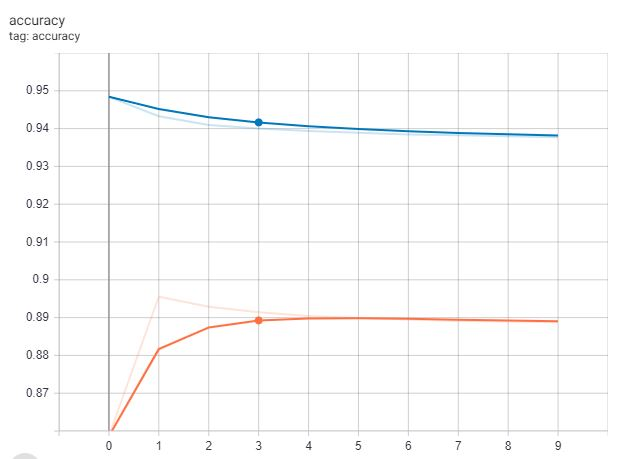

In [115]:
from IPython.display import Image
Image("/content/drive/My Drive/Colab Notebooks/basic_model1.JPG")

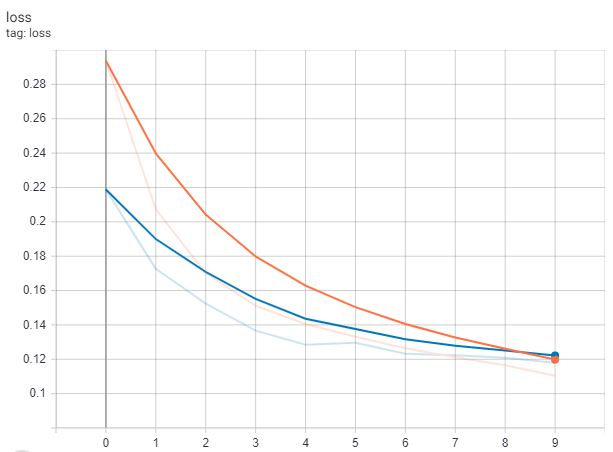

In [116]:
from IPython.display import Image
Image("/content/drive/My Drive/Colab Notebooks/basic_model2.JPG")

# Predictions :

In [117]:
def convert_to_tensor_ofimage(image_path,  model_image):
    image_vec = tf.io.read_file(image_path)
    image_vec = tf.image.decode_jpeg(image_vec, channels=3)
    image_vec = tf.image.resize(image_vec, (299, 299))
    image_vec = preprocess_input(image_vec)
    features_image = features_image_model(tf.constant(image_vec)[None, :])
    return features_image

In [118]:
def evaluate(im_id):
    img_tensor = tf.convert_to_tensor([convert_to_tensor_ofimage("/content/NLMCXR_png/" + im_id[0], features_image_model), 
                                      convert_to_tensor_ofimage("/content/NLMCXR_png/" + im_id[1], features_image_model)])# convert image list to tensor
    img_features = tf.constant(img_tensor)[None, :]
    features_val = encoder(img_features)
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 1)
    result = []
    text = ""
    for i in range(max_doc_length_x):

        predictions = decoder(dec_input, features_val)
        predictions = tf.reshape(predictions, [predictions.shape[0],predictions.shape[2]])
        predicted_id = tf.argmax(predictions, axis=1)[0].numpy()
        result.append(tokenizer.index_word[predicted_id])
        text += " " + tokenizer.index_word[predicted_id]
        if tokenizer.index_word[predicted_id] == '<end>':
            return result, text

        dec_input = tf.expand_dims([predicted_id], 1)
    return result, text

In [119]:

import matplotlib.image as mpimg
def Prediction_on_test(two_images):
    result, text = evaluate(two_images)
    """Prediction on test images """
    fig, axs = plt.subplots(1, len(two_images), figsize = (10,10), tight_layout=True)
    i = 0
    for each_img, subplot in zip(two_images, axs.flatten()):
        each_img1=mpimg.imread("/content/NLMCXR_png/"+each_img)
        imgplot = axs[i].imshow(each_img1, cmap = 'bone')
        i +=1
    plt.show()
    print("Predicted:",text)

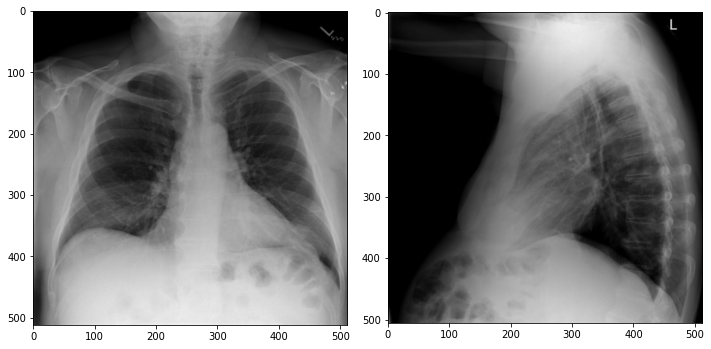

Predicted:  no acute cardiopulmonary abnormality <end>
Actual:  <start> no acute cardiopulmonary abnormality <end>


In [121]:
Prediction_on_test(X_test.loc[67])
print("Actual: ",y_test.loc[67])

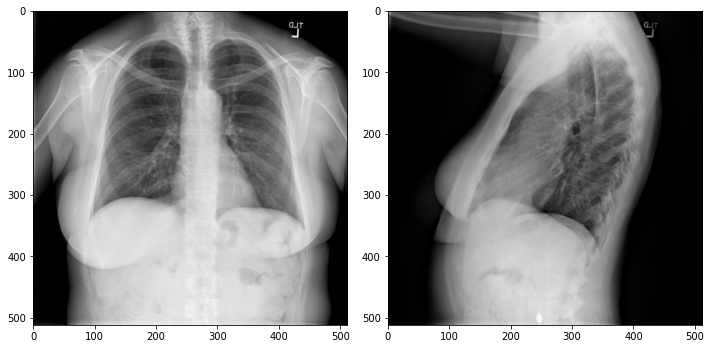

Predicted:  no acute cardiopulmonary disease <end>
Actual <start> no acute pulmonary disease <end>


In [122]:
Prediction_on_test(X_test.loc[1813])
print("Actual",y_test.loc[1813])

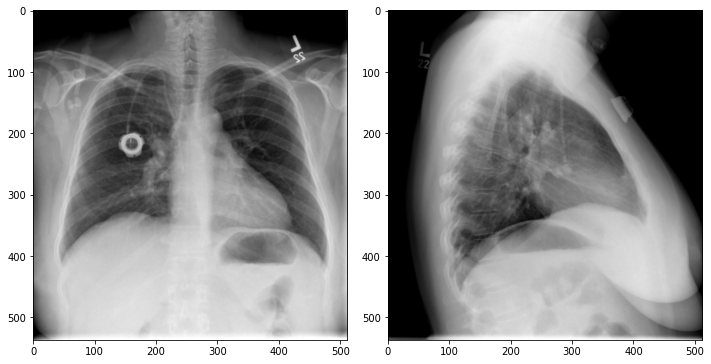

Predicted:  no acute cardiopulmonary findings <end>
Actual <start> no acute findings <end>


In [123]:
Prediction_on_test(X_test.loc[597])
print("Actual",y_test.loc[597])